<a href="https://colab.research.google.com/github/rapp2043/Statistics-For-Data-Science/blob/main/statistics_for_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.DataFrame({'movie':['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'], 'rating':[9,7,6,9,5,7,8,9,5]})

In [ ]:
df.mean()

<ipython-input-8-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rating    7.222222
dtype: float64

In [ ]:
df.rating.mean()

7.222222222222222

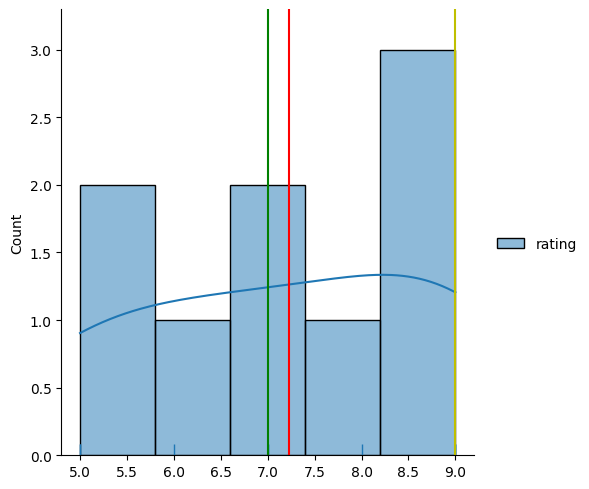

In [ ]:
sns.displot(df, kde=True, rug=True)
plt.axvline(np.mean(df.rating), color='r', linestyle='-')
plt.axvline(np.median(df.rating), color='g', linestyle='-')
plt.axvline(df.rating.mode().values[0], color='y', linestyle='-')


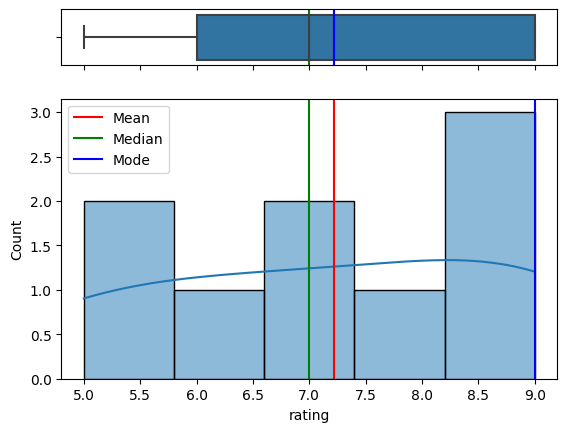

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={'height_ratios':(0.2,1,)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df, x='rating', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle ='-')
ax_box.axvline(median, color='g', linestyle ='-')
ax_box.axvline(mean, color='b', linestyle ='-')

sns.histplot(data=df, x='rating', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='-', label='Mean')
ax_hist.axvline(median, color='g', linestyle='-', label='Median')
ax_hist.axvline(mode, color='b', linestyle='-', label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [ ]:
df.rating.var()

2.6944444444444446

In [ ]:
df.rating.std()

1.6414763002993509

In [ ]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()

mean

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [ ]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

<Axes: xlabel='movie'>

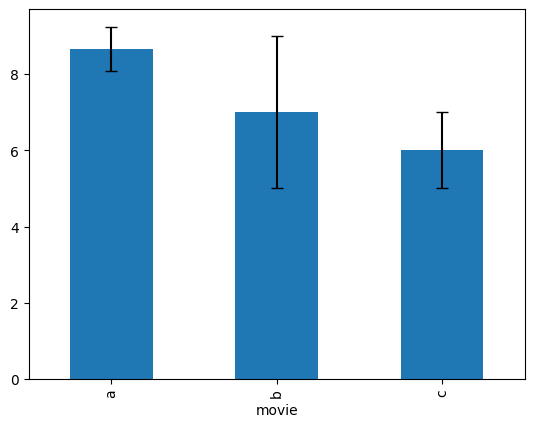

In [ ]:
fig, ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax, capsize=4)

In [ ]:
df1 = pd.DataFrame({'pop_sample':range(20)})

In [ ]:
#Sample Mean
df1.sample(5).mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of     pop_sample
16          16
19          19
14          14
18          18
11          11>

In [ ]:
df1.sample(10).mean()

pop_sample    12.3
dtype: float64

In [ ]:
#Population Mean
df1.mean()

pop_sample    9.5
dtype: float64

In [ ]:
#Getting the Standard Error
from scipy import stats

In [ ]:
stats.sem(df1)

array([1.32287566])

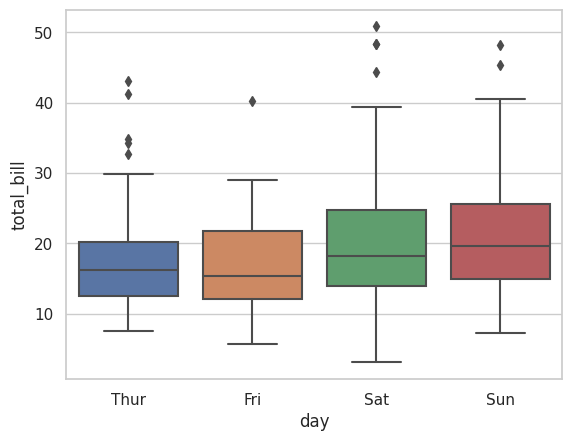

In [ ]:
#IQR (Visualize with Boxplot)
df2 = sns.load_dataset('tips')
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='day', y='total_bill', data=df2)

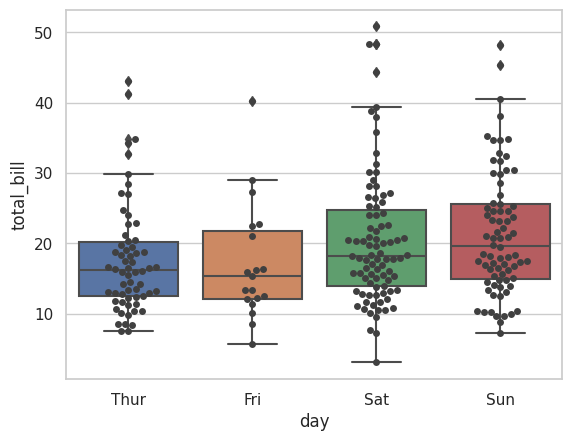

In [ ]:
#IQR (Scatterplot)
ax = sns.boxplot(x='day', y='total_bill', data=df2)
ax = sns.swarmplot(x='day', y='total_bill', data=df2, color='0.25')

In [ ]:
#Determining the Quartiles
print(df2['total_bill'].quantile([0.05, 0.25, 0.5, 0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [ ]:
#Quantile Range
print(df2['total_bill'].quantile(0.75) - df2['total_bill'].quantile(0.25))

10.779999999999998


In [ ]:
# prompt: determine the correlation

df3 = sns.load_dataset('iris')


<ipython-input-39-46314149e470>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df3.corr(), vmin=-1, vmax=1,


<function matplotlib.pyplot.show(close=None, block=None)>

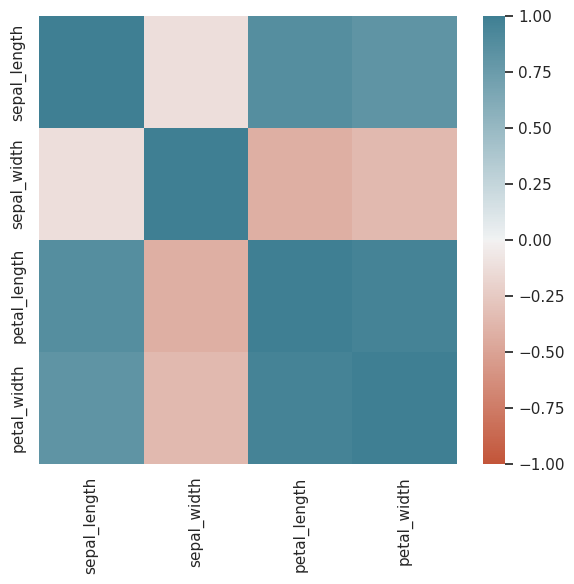

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax=sns.heatmap(df3.corr(), vmin=-1, vmax=1,
               cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)
plt.tight_layout()
plt.show

In [ ]:
#Determining Covariance
a = [11, 12, 22, 11]
b = [7,8,9,10]
c = [10,11,22,23]
arr = np.array([a,b,c])

In [ ]:
cov_matrix = np.cov(arr, bias=True)

In [ ]:
cov_matrix

array([[21.5 ,  1.25, 13.75],
       [ 1.25,  1.25,  6.25],
       [13.75,  6.25, 36.25]])

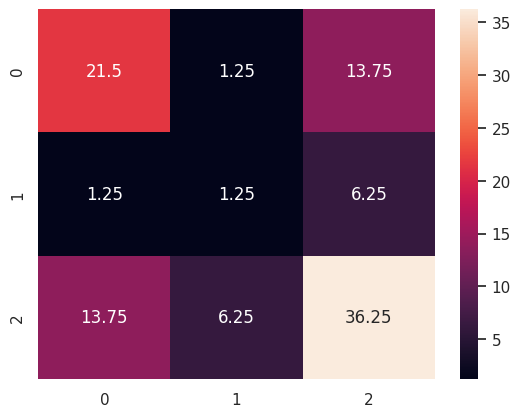

In [ ]:
sns.heatmap(cov_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
#Distributions (Skewness)
df.skew()

<ipython-input-45-b401109f0a97>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


rating   -0.23507
dtype: float64

In [ ]:
#Kurtosis
df.kurtosis()

<ipython-input-47-61a650d4cc36>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


rating   -1.570351
dtype: float64

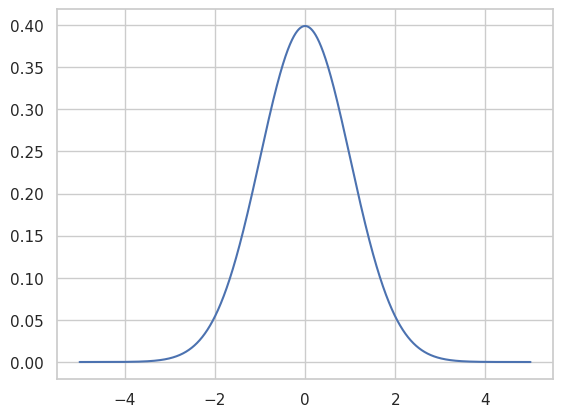

In [ ]:
#Normal Distribution
norm1 = np.arange(-5, 5, 0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1, mean, std)
plt.plot(norm1, pdf)
plt.show()

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

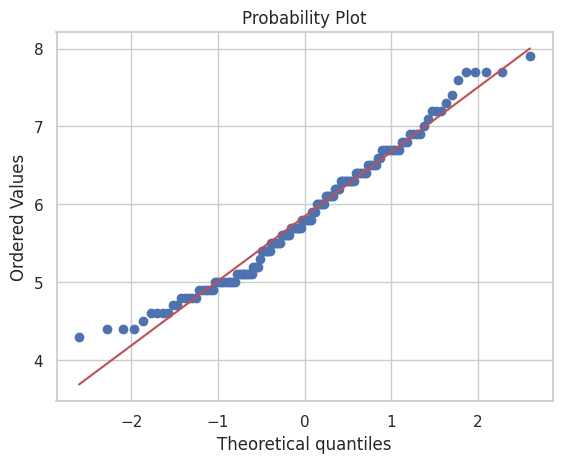

In [ ]:
import pylab
stats.probplot(df3.sepal_length, plot=pylab)

<Axes: xlabel='sepal_length', ylabel='Density'>

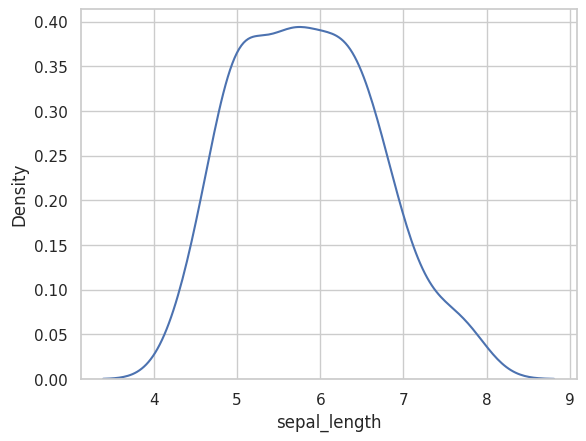

In [ ]:
sns.kdeplot(df3.sepal_length)

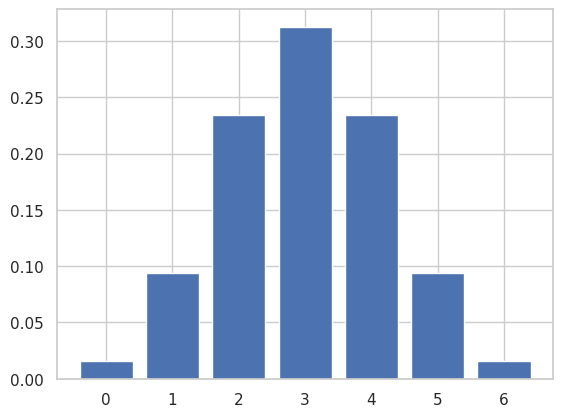

In [ ]:
from scipy.stats import binom
n = 6
p = 0.5
r_value = list(range(n+1))
dist = [binom.pmf(r, n, p) for r in r_value]
plt.bar(r_value, dist)
plt.show()

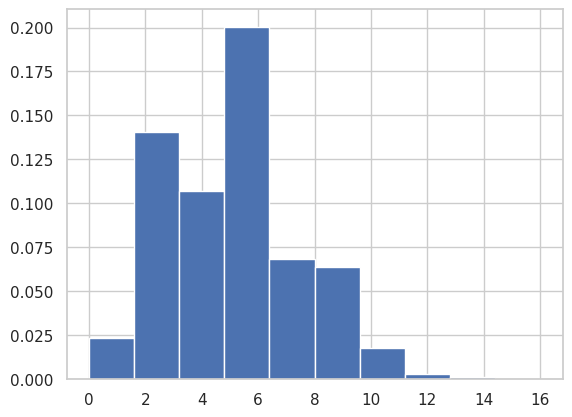

In [ ]:
#Poisson Dist
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 10, density=True)
plt.show()

In [ ]:
#Central Limit Therom (Confidence Interval)
import statsmodels.stats.api as sms
sms.DescrStatsW(df3.sepal_length).tconfint_mean()

(5.709732481507366, 5.976934185159301)